# BIO101 Epidemiology  Assignment
### By Kartikey Sharma and Surya Shukla

In [1]:
# Importing libraries

import pandas as pd   #dataframes
import math           #mathematical functions
import scipy          #integration
import numpy as np    #arrays
import seaborn as sns  #plotting
import matplotlib.pyplot as plt   #plotting
%matplotlib inline

from sklearn import preprocessing     #ml
from scipy import integrate, optimize  #optimizing the process 
import warnings
warnings.filterwarnings('ignore')  #to ignore the cases where division by 0 occurs


In [2]:
# Importing data
# The Day 1 is starting from 07/03/2020 (7th March 2020) when the first Confirmed case was reported

d=pd.read_csv("C:/Users/uttam/anaconda3/BIOProj/GithubData.csv")
d.tail(10)

,Province_State,Country_Region,Days Passed,Infected,Deaths,Recovered,Active,Fatal per Confirmed,Recovered per Confirmed,Fatal per(Fatal or recovered),Growth Rate,Daily Confirmed,Population,Susceptible
95,South Carolina,US,96,16441,588,7928,7925.0,0.035764,0.482209,0.069047,1.284369,682,5150000,5125631
96,South Carolina,US,97,17170,593,8682,7895.0,0.034537,0.505649,0.063935,1.068915,729,5150000,5124148
97,South Carolina,US,98,17955,599,8682,8674.0,0.033361,0.483542,0.064540,1.076818,785,5150000,5123363
98,South Carolina,US,99,18795,600,8682,9513.0,0.031923,0.461931,0.064641,1.070064,840,5150000,5122523
99,South Carolina,US,100,19378,602,8682,10094.0,0.031066,0.448034,0.064843,0.694048,583,5150000,5121940
100,South Carolina,US,101,19990,607,9734,9649.0,0.030365,0.486943,0.058698,1.049743,612,5150000,5120276
101,South Carolina,US,102,20556,617,9734,10205.0,0.030016,0.473536,0.059608,0.924837,566,5150000,5119710
102,South Carolina,US,103,21533,621,9734,11178.0,0.028839,0.452050,0.059971,1.726148,977,5150000,5118733
103,South Carolina,US,104,22608,639,10790,11179.0,0.028264,0.477265,0.055910,1.100307,1075,5150000,5116602
104,South Carolina,US,105,23756,644,10790,12322.0,0.027332,0.467173,0.055392,1.322199,1148,5150000,5115454


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Province_State                 105 non-null    object 
 1   Country_Region                 105 non-null    object 
 2   Days Passed                    105 non-null    int64  
 3   Infected                       105 non-null    int64  
 4   Deaths                         105 non-null    int64  
 5   Recovered                      105 non-null    int64  
 6   Active                         70 non-null     float64
 7   Fatal per Confirmed            105 non-null    float64
 8   Recovered per Confirmed        105 non-null    float64
 9   Fatal per(Fatal or recovered)  105 non-null    float64
 10  Growth Rate                    105 non-null    float64
 11  Daily Confirmed                105 non-null    int64  
 12  Population                     105 non-null    int

There is missing data(35)in the 'Active' column

In [4]:
d.corr()

,Days Passed,Infected,Deaths,Recovered,Active,Fatal per Confirmed,Recovered per Confirmed,Fatal per(Fatal or recovered),Growth Rate,Daily Confirmed,Population,Susceptible
Days Passed,1.000000,0.957509,0.982548,0.981078,0.658614,0.773487,0.639171,0.669423,-0.102642,0.679563,NaN,-0.968678
Infected,0.957509,1.000000,0.966767,0.985225,0.832050,0.587306,0.465657,0.513966,-0.080408,0.794664,NaN,-0.998314
Deaths,0.982548,0.966767,1.000000,0.986408,0.607036,0.711638,0.530266,0.592645,-0.086289,0.682016,NaN,-0.976634
Recovered,0.981078,0.985225,0.986408,1.000000,0.750166,0.671551,0.550826,0.544484,-0.092565,0.723507,NaN,-0.993505
Active,0.658614,0.832050,0.607036,0.750166,1.000000,-0.504813,-0.493897,-0.122698,-0.008890,0.811473,NaN,-0.810240
Fatal per Confirmed,0.773487,0.587306,0.711638,0.671551,-0.504813,1.000000,0.880170,0.873365,-0.128226,0.261433,NaN,-0.617808
Recovered per Confirmed,0.639171,0.465657,0.530266,0.550826,-0.493897,0.880170,1.000000,0.714682,-0.169924,0.218827,NaN,-0.496069
Fatal per(Fatal or recovered),0.669423,0.513966,0.592645,0.544484,-0.122698,0.873365,0.714682,1.000000,-0.097444,0.323503,NaN,-0.526016
Growth Rate,-0.102642,-0.080408,-0.086289,-0.092565,-0.008890,-0.128226,-0.169924,-0.097444,1.000000,0.004241,NaN,0.084795
Daily Confirmed,0.679563,0.794664,0.682016,0.723507,0.811473,0.261433,0.218827,0.323503,0.004241,1.000000,NaN,-0.773187


The correlation between Confirmed and Days Passed,Death and Days Passed,Recovered and Days Passed,Confirmed and Deaths, Confirmed and Recovered,Recovered and Deaths is VERY HIGH. This implies that they are heavily correlated.

## Exploratory Data Analysis

## Visualising Data with respect to Days Passed

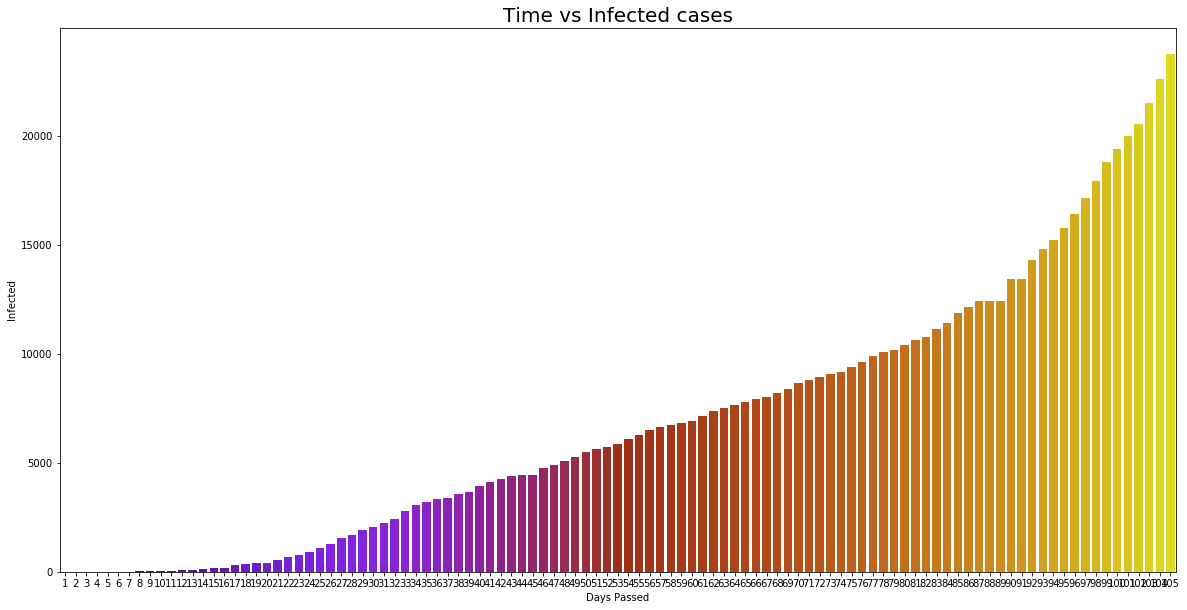

In [5]:
# confirmed cases
plt.figure(figsize=(20,10))
plt.title("Time vs Infected cases",fontsize=20)
sns.barplot(data=d, y="Infected",x='Days Passed',palette='gnuplot')
plt.show()

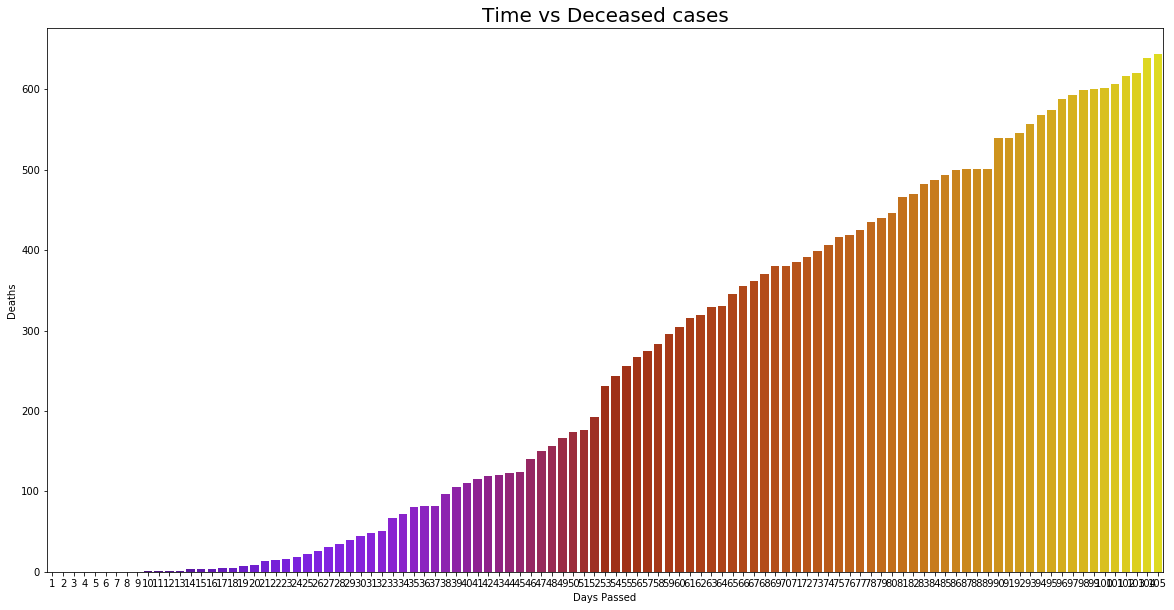

In [6]:
# deceased cases
plt.figure(figsize=(20,10))
plt.title("Time vs Deceased cases",fontsize=20)
sns.barplot(data=d, y="Deaths",x='Days Passed',palette='gnuplot')
plt.show()

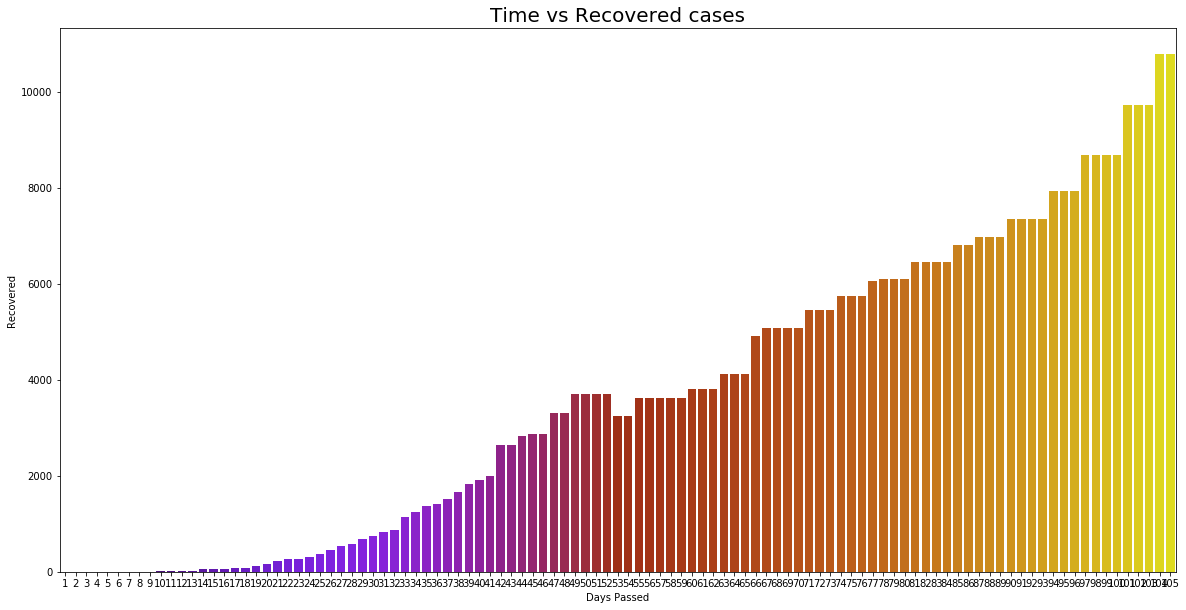

In [7]:
#recovered cases
plt.figure(figsize=(20,10))
plt.title("Time vs Recovered cases",fontsize=20)
sns.barplot(data=d, y="Recovered",x='Days Passed',palette='gnuplot')
plt.show()

## Visualising Together

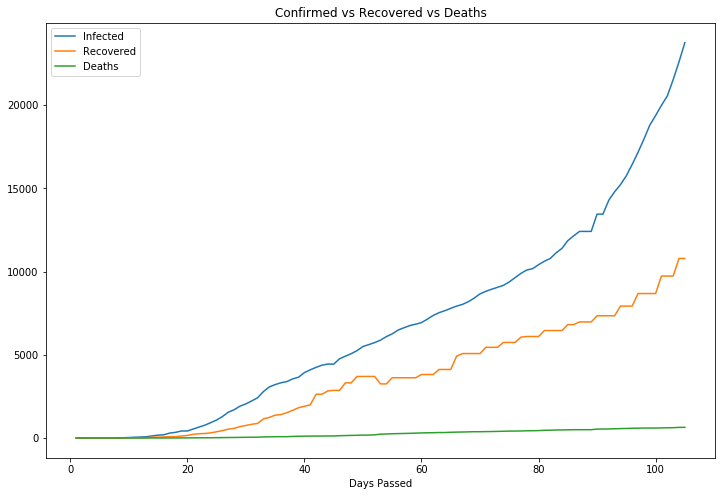

In [8]:
#Plotting all three columns together
d[0:114].plot(x='Days Passed', y=["Infected","Recovered","Deaths"] ,figsize=(12,8), grid=False,title="Confirmed vs Recovered vs Deaths")
plt.show()

Clearly, Suuth Carolina's number of infected people's curve has not peaked.. and as the recovered curve has not crossed the confirmed curve, the situation is still an outbreak

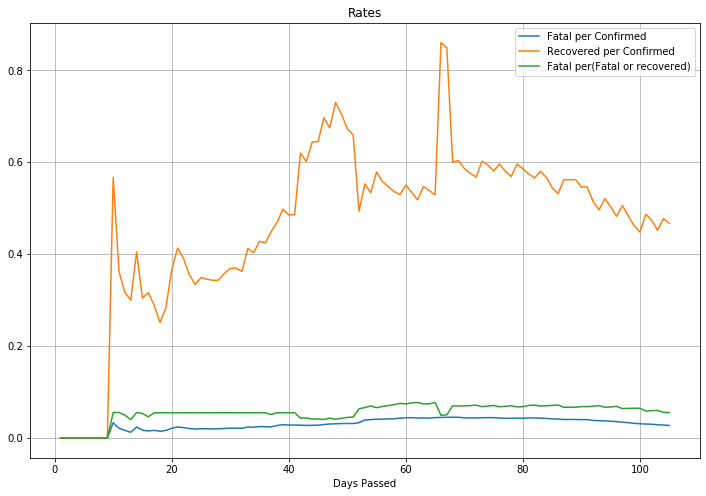

In [9]:
# Plotting the rates of fatality and recovery

d[0:].plot(x='Days Passed', y=["Fatal per Confirmed","Recovered per Confirmed","Fatal per(Fatal or recovered)"] ,figsize=(12,8), grid=True,title="Rates")
plt.show()

## Growth factor
Where  C  is the number of confirmed cases,<br>
Growth Factor =ΔC(n)/ΔC(n−1)

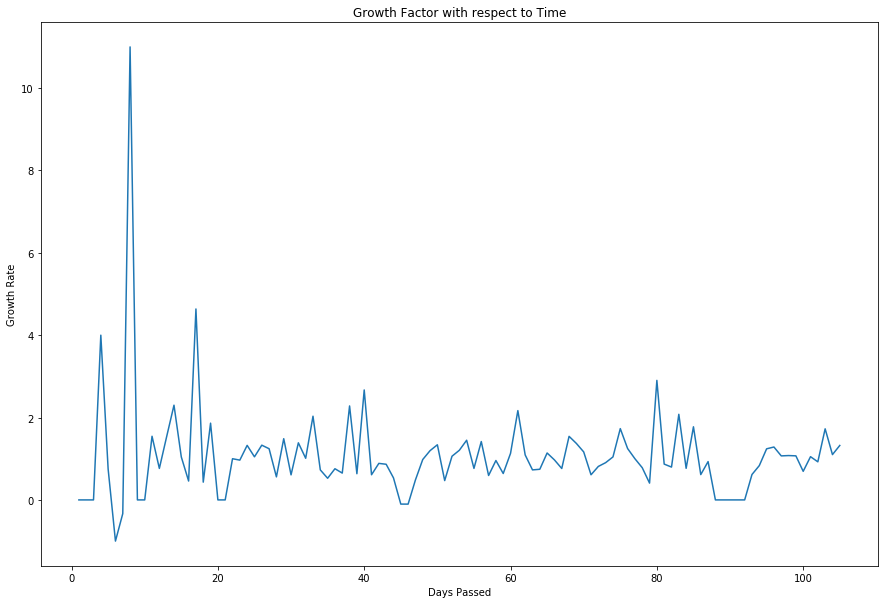

In [10]:
plt.figure(figsize=(15,10))
plt.title("Growth Factor with respect to Time")
sns.lineplot(data=d,y='Growth Rate',x='Days Passed')
plt.show()

We see that eventually,the growth rate is approaching 1, ie, earlier there was an outbreak of the coronavirus in South Carolina, but it stabilised with time.

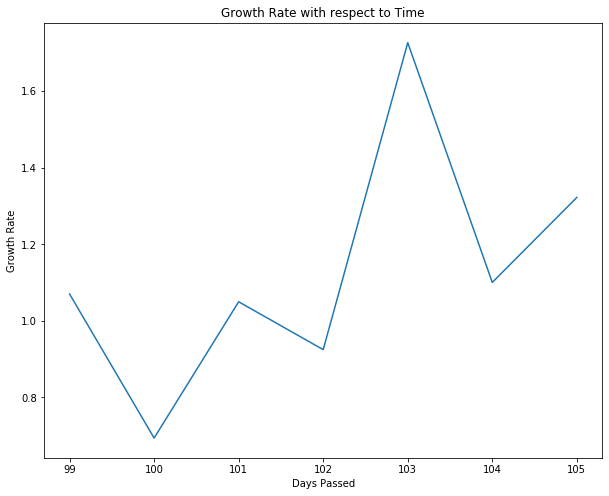

In [3]:
# last 7 days
plt.figure(figsize=(10,8))
plt.title("Growth Rate with respect to Time")
sns.lineplot(data=d[98:],y='Growth Rate',x='Days Passed')
plt.show()

## ==============================EDA ENDS================================

# SIR COVID Model

There's a lot of information to be extracted from this data; for example, we haven't analyzed the effects of long/lat of countries. However, since our main purpose is to develop a predective model in order to understand the key factors that impact the COVID-19 transmission, we will use the SIR model.<br><br>
SIR is a simple model that considers a population that belongs to one of the following states:<br>

1.  Susceptible (S). The individual hasn't contracted the disease, but she can be infected due to transmisison from infected people<br>
2.  Infected (I). This person has contracted the disease<br>
3.  Recovered/Deceased (R). The disease may lead to one of two destinies: either the person survives, hence developing inmunity to the disease, or the person is deceased.<br>

In [13]:
davg= d.Deaths[103]/(d.Deaths[103]+d.Recovered[103])
print("D average is "+str(davg))

D average is 0.055910403359874


In [14]:
population= 5150000

# source : https://bit.ly/3er5bnx

### Calculating Rho

In [15]:
# Defining lists of various parameters

s= list(d.Susceptible)
i= list(d.Infected)
r= list(d.Recovered + d.Deaths)
dates= list(d['Days Passed'])

def rhovalue(sus, inf, s0):
    return (inf + sus - population) / math.log( sus / s0)

rhovalues = [rhovalue(sus, inf, s[0]) for sus, inf in zip(s[1:], i[1:])]

rho= sum(rhovalues) / len(rhovalues)
rho= round(rho,4)
print("Optimal values of rho is "+str(rho))

Optimal values of rho is 1577169.2522


### Calculating Alpha and Phi

In [16]:
# Calculating alpha and phi according to the formulaes of Google Classroom lectures

alpha = math.sqrt((s[0]/rho - 1) ** 2 + (2*s[0]*(population - s[0])) / (rho ** 2))
phi   = np.arctanh([(s[0]/rho - 1)/alpha])[0]
print("Value of Alpha is   : "+str(round(alpha,4)))
print("Value of Phi is     : "+str(round(phi,4)))

Value of Alpha is   : 2.2653
Value of Phi is     : 7.7082


### Calculating Beta and Gamma

In [17]:
#function to generate gamma
def gamma(r, t):
    x = (((r*s[0]) / (rho*rho) - s[0]/rho + 1)) / alpha
    tanhi = np.arctanh([x])[0]
    return ((phi + tanhi) * 2) / (alpha * t)

gamma_values=[]
for index,row in d.iterrows():
    #print(row['Recovered'])
    gval= gamma(row['Recovered'], index+1)
    gamma_values.append(gval)

gammaavg = sum(gamma_values) / len(gamma_values)
betaavg = gammaavg / rho

print("Optimal value of Beta is   : " +str(betaavg))
print("Optimal value of Gamma is  : " +str(gammaavg))


Optimal value of Beta is   : 4.6196861176529646e-08
Optimal value of Gamma is  : 0.07286026899577447


### Equations governing SIR

In [18]:
# Defining the underlying governing equations
def sir(y, t, r, a):
    S, I, R = y

    ds = -r * S * I
    dr = a * I
    di = r * S * I - a * I

    return [ds, di, dr]

### Applied for South Carolina using optimal parameters

In [22]:
# Values for South Carolina
N  = population
i0 = 1                 # Initial infected 
r0 = 0.0
s0 = (N - i0)          # Initial Susceptible

t = np.linspace(0, 200, 1000)


#Solve a system of ordinary differential equations using lsoda from the FORTRAN library odepack.
#Solves the initial value problem for stiff or non-stiff systems of first order ode-s:

solution = scipy.integrate.odeint(sir, [s0, i0, r0], t, args = (betaavg, gammaavg))

### Calculating other important variables

In [23]:
def find_ro():
    return (s0 * betaavg) / gammaavg

def max_infected(infected):
    yval = infected[0].get_ydata()
    xval = infected[0].get_xdata()
    maxinfected = max(yval)
    return maxinfected

def recovered_at_end(recovered):
    xval = recovered[0].get_xdata()
    yval = recovered[0].get_ydata()
    return yval[-1]  

def covid_duration(infected):
    yval = infected[0].get_ydata()
    xval = infected[0].get_xdata()
    for i in range(len(yval)):
        if (yval[i] == yval[i-1]):
            break
    return xval[i-1]

    

### Plotting the graph

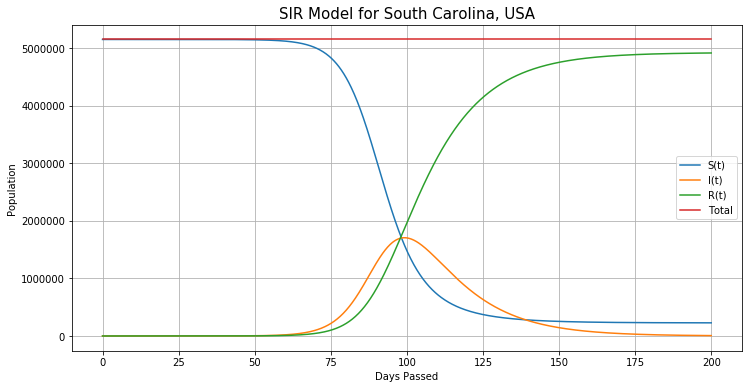

In [24]:
# Plotting the graph

plt.figure(figsize = [12, 6])
plt.grid()
plt.xlabel("Days Passed")
plt.ylabel("Population")
plt.title("SIR Model for South Carolina, USA",fontsize=15)

susceptibles = plt.plot(t, solution[:, 0], label = "S(t)")
infectives   = plt.plot(t, solution[:, 1], label = "I(t)")
recovered    = plt.plot(t, solution[:, 2], label = "R(t)")
sns.lineplot(y=5150000,x=t,label='Total')

plt.show()

In [21]:
print("Duration of the epidemic                               : " + str(int(covid_duration(infectives))) + " days")
print("Maximum number of infectives                           : " + str(int(max_infected(infectives)))+" people")
print("Individuals Recovered                                  : " + str(int(round(recovered_at_end(recovered))))+" people")
print("Basic rate of Reproduction                             : " + str(round(find_ro(), 5)))



Duration of the epidemic                               : 349 days
Maximum number of infectives                           : 1706449 people
Individuals Recovered                                  : 4922897 people
Basic rate of Reproduction                             : 3.26534


## Logistic Regression to Fit Confirmed Cases and See the Curve for Total Infected

In [4]:
from scipy.optimize import curve_fit

x_data = range(len(d.index))
y_data = d['Infected']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))



In [5]:
# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)

estimated_k, estimated_x_0, ymax= popt

Days after which infected curve hits inflection point is   : 164.4
Maximum number of infected people are                      : 1650150


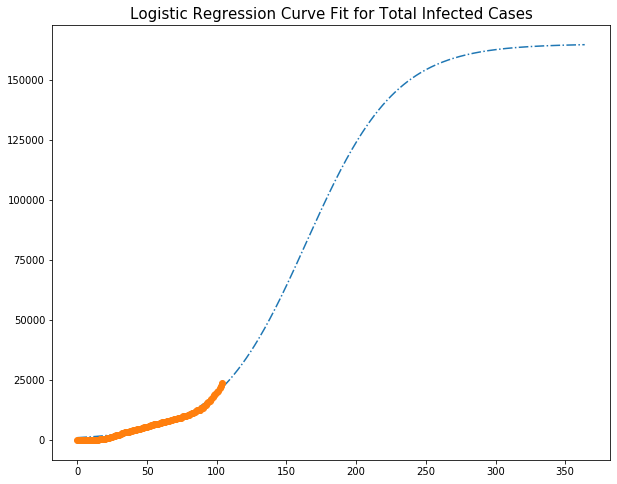

In [6]:
# Plot the fitted curve

k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,365), k, x_0, ymax)
print("Days after which infected curve hits inflection point is   : "+str(round(x_0,1)))
print("Maximum number of infected people are                      : "+str(int(ymax)*10))


plt.figure(figsize=(10,8))
plt.title("Logistic Regression Curve Fit for Total Infected Cases",fontsize=15)
plt.plot(range(0,365), y_fitted, '-.', label="Fitted Curve")
plt.plot(x_data, y_data,'o' ,label="Confirmed Data")

Logistic regression fits the data well. Hence, we can predict that 

## =========================END OF NOTEBOOK==============================

In [22]:
# Coded by : Kartikey Sharma
# Jack of all trades, Master of some.
# Veni. Vidi. Vici.